In [3]:
# python notebook for curve fitting using Pade approximants 
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 

2048


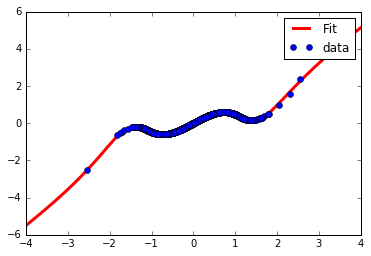

In [101]:

from scipy.optimize import curve_fit
def f_target(x):
    xl = -4. 
    xr = 4. 
    p = np.exp(-(x-xl)**2/2.) + np.exp(-(x-xr)**2/2.)
    dp = -(x-xl) * np.exp(-(x-xl)**2/2.) - (x-xr) * np.exp(-(x-xr)**2/2.)

    return p/dp   

def rational(x, p, q):
    """
    The general rational function description.
    p is a list with the polynomial coefficients in the numerator
    q is a list with the polynomial coefficients (except the first one)
    in the denominator
    The first coefficient of the denominator polynomial is fixed at 1.
    """
    return np.polyval(p, x) / np.polyval([1] + q, x)

def f_target1(x):
    g = 0.1
    p = np.exp(-x**2/2. - g * x**4)
    dlogp = (-x - 4. * g * x**3)
    return dlogp 

def poly(x,a0,a1,a2, a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14):
    #return (a0 + a1 * x)
    a = [a0,a1,a2, a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14]
    return np.polyval(a, x)

def cont_exp(x,a0,a1,a2,a3,c1,c2):
    return c1 * np.exp(a0 * (x-a1)) + c2 * np.exp(a2 *(x-a3)) 

def pade(x,a0,a1,a2,a3,a4,a5, b1,b2,b3,b4):
    return rational(x, [a0, a1, a2, a3,a4,a5], [b1,b2,b3,b4])


xdata, rdata = np.genfromtxt('/home/bing/git/pyQMD/QTM_F/1D/double_well/r.out',unpack=True, usecols=(0,2))

print(len(xdata))

popt, pcov = curve_fit(pade, xdata, rdata)

# Constrain the optimization to the region of 0 < a < 3, 0 < b < 2 and 0 < c < 1:
x = np.linspace(-4,4)
yfit = pade(x,*popt)


plt.figure() 
plt.plot(x,yfit,'r-',lw=3,label='Fit')
plt.plot(xdata,rdata,'o',label='data')

plt.legend()


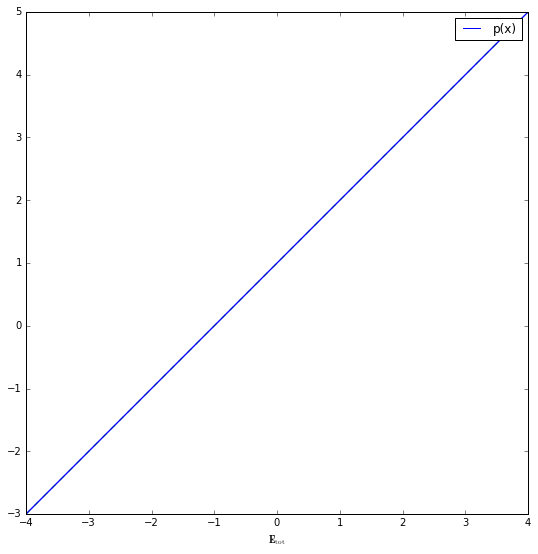

In [83]:
from scipy import misc
e_exp = [1.0, 1.0, 0.0,0.0]
p, q = misc.pade(e_exp, 2)

e_exp.reverse()
e_poly = np.poly1d(e_exp)

# Compare e_poly(x) and the pade approximation p(x)/q(x)
x = np.linspace(-4,4)
y = e_poly(x)


yfit = p(x)/q(x) 
plt.figure(figsize=(9,9))
plt.plot(x,y)
plt.plot(x,yfit,'--')
plt.plot(x,p(x),'b-',label='p(x)')

plt.xlabel('$\mathbf{E}_{\mathrm{tot}}$')



plt.legend()




In [95]:
x = np.linspace(-8,8,1000)
a = 0.28
dx = x[1] - x[0]
w = 4.0 * (2. * a )** 1.5 / np.pi**0.5 * np.exp(- 2. * a * x**2) * x**2 * dx


AttributeError: module 'numpy' has no attribute 'sec'